In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = keras.datasets.fashion_mnist

In [7]:
(x_train,y_train),(x_test,y_test) = data.load_data()

4431872/4422102 [==============================] - 9s 2us/step


In [8]:
x_train.shape

(60000, 28, 28)

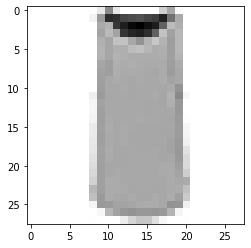

In [43]:
plt.imshow(x_train[2],cmap=plt.cm.binary)

In [87]:
class_names = ['T-shirts','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

In [33]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [45]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [46]:
y_train.shape

(60000,)

In [47]:
x_train = x_train/255
x_test = x_test/255

In [49]:
x_train.shape

(60000, 28, 28)

In [117]:
#sequnctial= sequence of layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer 28x28 = flatten
    keras.layers.Dense(128,activation="leaky_relu"), #hidden layer
    keras.layers.Dense(10,activation="softmax") #output layer
])

In [122]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [123]:
model.fit(x_train,y_train,epochs=7) #epochs randomly picks random values from training data and feed in neutral networks

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8973
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.8992
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9009
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9048
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2528 - accuracy: 0.9051
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9076
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2423 - accuracy: 0.9100


In [120]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8719


In [121]:
test_acc

0.8719000220298767

In [96]:
prediction = model.predict(x_test)

In [97]:
predicted_item = np.argmax(prediction[3])

In [98]:
class_names[predicted_item]

'Trouser'

In [102]:
#show the input and predicted value, to evaluate our prediction

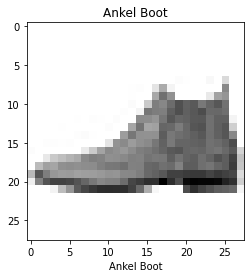

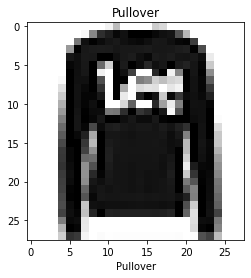

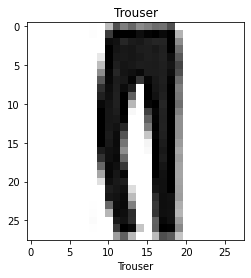

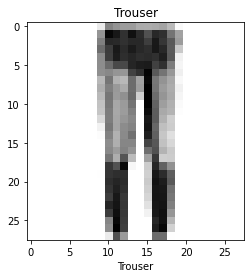

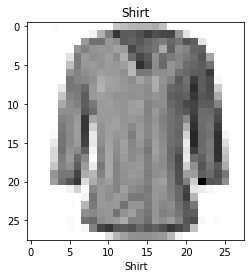

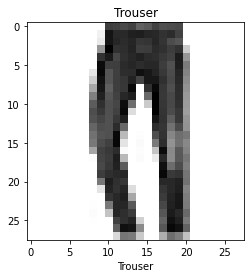

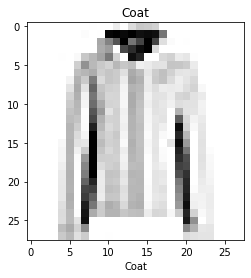

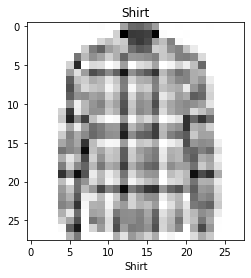

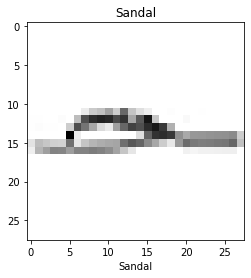

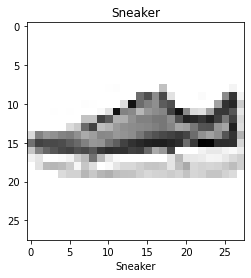

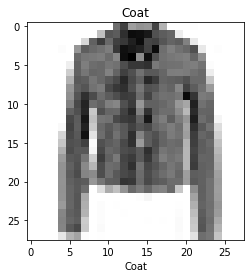

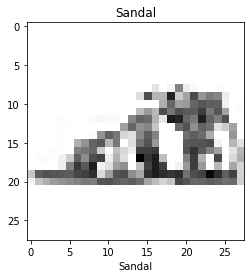

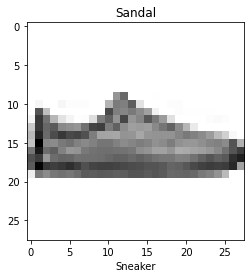

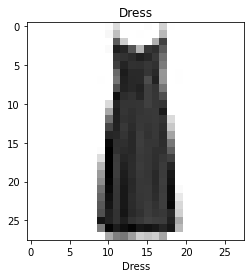

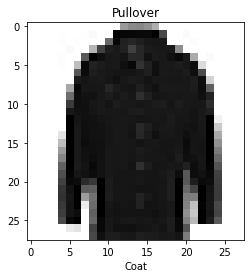

In [107]:
for i in range(15):
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
    plt.title(class_names[np.argmax(prediction[i])])
    plt.show()